In [4]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 768.3 kB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 4.9 MB/s eta 0:00:0031m14.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 KB 3.2 MB/s eta 0:00:008.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 KB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [12]:
X_train = np.loadtxt('Downloads/Image Classification/input.csv',delimiter =',')
Y_train = np.loadtxt('Downloads/Image Classification/labels.csv',delimiter =',')
X_test = np.loadtxt('Downloads/Image Classification/input_test.csv',delimiter =',')
Y_test = np.loadtxt('Downloads/Image Classification/labels_test.csv',delimiter =',')

In [25]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)
X_train = X_train/255.00
Y_train = Y_train/255.00
X_test =  X_test/255.00
Y_test = Y_test/255.00

In [27]:
print("The Shape of X_train is ",X_train.shape )
print("The Shape of Y_train is ",Y_train.shape )
print("The Shape of X_test is ",X_test.shape )
print("The Shape of Y_test is ",Y_test.shape )

The Shape of X_train is  (2000, 100, 100, 3)
The Shape of Y_train is  (2000, 1)
The Shape of X_test is  (400, 100, 100, 3)
The Shape of Y_test is  (400, 1)


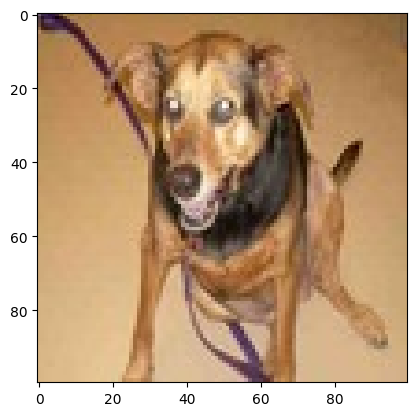

In [54]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()


In [57]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [86]:
#opt = keras.optimizer.SGD(learning_rate = 0.1)
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [87]:
model.fit(X_train,Y_train,epochs = 7,batch_size = 24)

Epoch 1/7
84/84 [==============================] - 16s 161ms/step - loss: 0.0142 - accuracy: 0.5000
Epoch 2/7
84/84 [==============================] - 12s 148ms/step - loss: 0.0137 - accuracy: 0.5000
Epoch 3/7
84/84 [==============================] - 12s 145ms/step - loss: 0.0135 - accuracy: 0.5000
Epoch 4/7
84/84 [==============================] - 12s 145ms/step - loss: 0.0135 - accuracy: 0.5000
Epoch 5/7
84/84 [==============================] - 12s 144ms/step - loss: 0.0134 - accuracy: 0.5000
Epoch 6/7
84/84 [==============================] - 12s 146ms/step - loss: 0.0134 - accuracy: 0.5000
Epoch 7/7
84/84 [==============================] - 12s 143ms/step - loss: 0.0133 - accuracy: 0.5000


In [64]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 45ms/step - loss: 0.0140 - accuracy: 0.5000


[0.014049271121621132, 0.5]

1/1 [==============================] - 0s 46ms/step


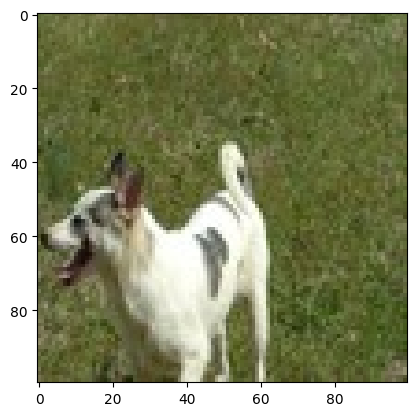

Our Model says it is a  Dog


In [83]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
Y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
Y_pred = Y_pred > 0.5
if(Y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'
plt.show()
print("Our Model says it is a ",pred)